In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Stuff for windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

# plt.rcParams['figure.figsize'] = [11,7]

In [4]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [5]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [6]:
df=pd.read_csv('raw_data/long_term.csv',parse_dates=[3])
df.dropna(subset=['datetime'],inplace=True)
df.drop(['uncertainty', 'qualifiers', 'frequency'],axis=1, inplace=True)
df.index = df.datetime
df.site = df.site.astype(str)
df.tail()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value
datetime,,,,,,,,,,,,,,,,,
2011-06-25 06:00:00,840420430401,0.0,10.0,2011-06-25 06:00:00,88101.0,60.0,8.6,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2009-10-01 06:00:00,840420430401,0.0,10.0,2009-10-01 06:00:00,88101.0,60.0,3.4,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2016-04-27 06:00:00,840420430401,0.0,10.0,2016-04-27 06:00:00,88101.0,60.0,2.6,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2009-01-16 06:00:00,840420430401,0.0,10.0,2009-01-16 06:00:00,88101.0,60.0,10.1,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2015-10-28 06:00:00,840420430401,1.0,10.0,2015-10-28 06:00:00,88101.0,60.0,4.9,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0


In [7]:
df.sort_index();

In [8]:
df.replace({'unit':unitsDict, 'parameter':paramsDict}, inplace=True)

In [9]:
(PM10, O3, CO, NO2, SO2, PM25) = df.parameter.unique()
print(df.parameter.unique())

['PM10 Total 0-10um STP' 'Ozone' 'Carbon monoxide' 'Nitrogen dioxide (NO2)'
 'Sulfur dioxide' 'PM2.5 - Local Conditions']


In [10]:
[df.datetime.min(),df.datetime.max()]

[Timestamp('2000-01-01 05:00:00'), Timestamp('2017-01-01 04:00:00')]

In [11]:
df.describe()

,data_status,action_code,duration,value,qc,poc,lat,lon,elev,method_code,mpc,mpc_value
count,474936.000000,474936.0,474936.0,474936.000000,474936.0,474936.000000,4.749360e+05,4.749360e+05,474936.0,474936.000000,474936.0,474936.000000
mean,0.431784,10.0,60.0,9.239459,0.0,2.044937,4.024699e+01,-7.684699e+01,125.0,99.556633,1.0,-9.157663
std,0.495325,0.0,0.0,11.372314,0.0,1.631349,2.131630e-14,7.105435e-14,0.0,25.553775,0.0,20.981478
min,0.000000,10.0,60.0,-10.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,79.000000,1.0,-50.000000
25%,0.000000,10.0,60.0,0.070000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,87.000000,1.0,0.005000
50%,0.000000,10.0,60.0,5.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,93.000000,1.0,0.400000
75%,1.000000,10.0,60.0,14.000000,0.0,3.000000,4.024699e+01,-7.684699e+01,125.0,100.000000,1.0,2.700000
max,1.000000,10.0,60.0,321.000000,0.0,5.000000,4.024699e+01,-7.684699e+01,125.0,170.000000,1.0,5.000000


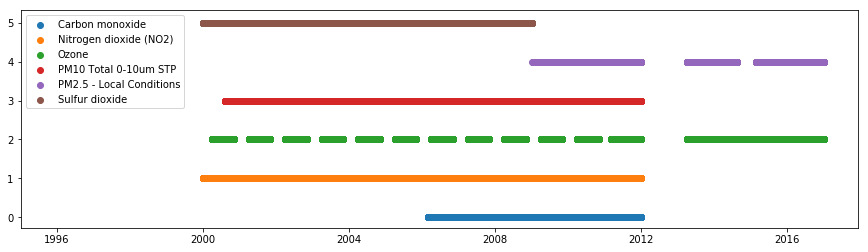

In [34]:
#df[df.parameter==O3].value.plot()
params = list(df.parameter.unique())
params.sort()

ax = plt.figure(figsize=(15,4)).add_subplot(111)

for i, param in enumerate(params):
    data = df[df.parameter == param].index
    ax.scatter(data, [i]*len(data))

ax.set_xlim(left=pd.to_datetime('1/1/1995'))
ax.legend(params);

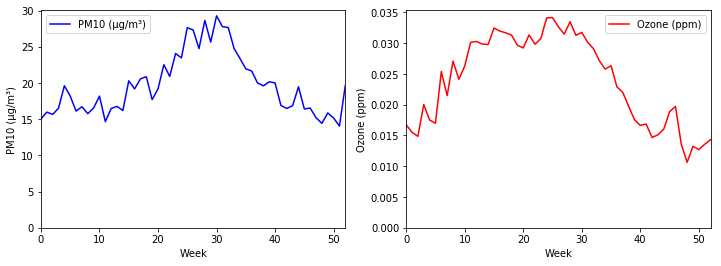

In [11]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time

fig = plt.figure(figsize=(12,4)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122)


annual_mean = df[df.parameter==PM10].groupby('woy').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='upper left')
ax.set_ylabel('PM10 (μg/m³)')
ax.set_ylim(ymin=0)

annual_mean = df[df.parameter==O3].groupby('woy').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'])
ax2.set_ylabel('Ozone (ppm)')
ax2.set_ylim(ymin=0)

ax.set_xlabel('Week')
ax2.set_xlabel('Week')

plt.savefig('annual.png',dpi=1000)

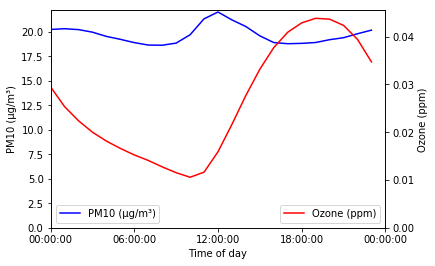

In [12]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

annual_mean = df[df.parameter==PM10].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

annual_mean = df[df.parameter==O3].groupby('tod').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'],loc='lower right')
ax2.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)

plt.savefig('daily.png',dpi=1000)

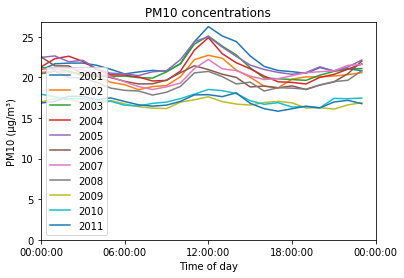

In [13]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

# years = [2001, 2011]
years = list(range(2001,2012))

for year in years:
    annual_mean = df[(df.parameter==PM10) & (df.year==year)].groupby('tod').value.mean()
    annual_mean.plot(ax=ax)

ax.legend(years,loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('PM10 concentrations')

plt.savefig('change_pm10.png',dpi=1000)

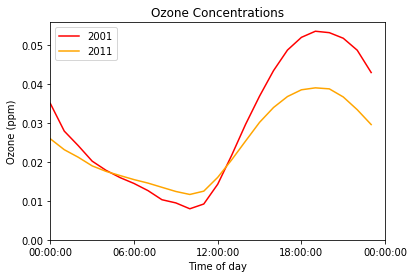

In [14]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==O3) & (df.year==2001)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='red')

annual_mean = df[(df.parameter==O3) & (df.year==2011)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='orange')

ax.legend(['2001','2011'])
ax.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Ozone Concentrations')

plt.savefig('change_O3.png',dpi=1000)

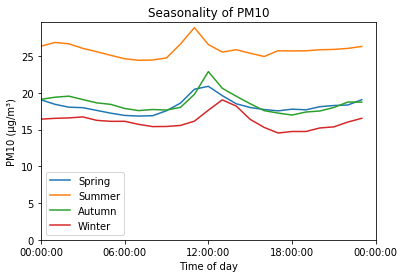

In [15]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year
df['month']=df.index.month

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.month>2) & (df.month<=5)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>5) & (df.month<=8)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>8) & (df.month<=11)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & ((df.month>11) | (df.month<=2))].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

ax.legend(['Spring','Summer','Autumn','Winter'])
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Seasonality of PM10')

plt.savefig('seasonality.png',dpi=1000)

In [16]:
for p in df.parameter.unique():
    print(p, df[df.parameter==p].unit.unique())

PM10 Total 0-10um STP ['Micrograms/cubic meter (25 C)']
Ozone ['Parts per million']
Carbon monoxide ['Parts per million']
Nitrogen dioxide (NO2) ['Parts per billion']
Sulfur dioxide ['Parts per billion']
PM2.5 - Local Conditions ['Micrograms/cubic meter (LC)']


In [17]:
df.tail()

,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,...,GISDatum,elev,method_code,mpc,mpc_value,doy,woy,tod,year,month
datetime,,,,,,,,,,,,,,,,,,,,,
2011-06-25 06:00:00,840420430401,0.0,10.0,2011-06-25 06:00:00,PM2.5 - Local Conditions,60.0,8.6,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.0,176,25,06:00:00,2011,6
2009-10-01 06:00:00,840420430401,0.0,10.0,2009-10-01 06:00:00,PM2.5 - Local Conditions,60.0,3.4,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.0,274,39,06:00:00,2009,10
2016-04-27 06:00:00,840420430401,0.0,10.0,2016-04-27 06:00:00,PM2.5 - Local Conditions,60.0,2.6,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.0,118,16,06:00:00,2016,4
2009-01-16 06:00:00,840420430401,0.0,10.0,2009-01-16 06:00:00,PM2.5 - Local Conditions,60.0,10.1,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.0,16,2,06:00:00,2009,1
2015-10-28 06:00:00,840420430401,1.0,10.0,2015-10-28 06:00:00,PM2.5 - Local Conditions,60.0,4.9,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.0,301,43,06:00:00,2015,10


In [20]:
df.site.unique()

array(['840420430401'], dtype=object)

# Meterology

In [104]:
meterology = pd.read_csv('raw_data/meterology.csv', parse_dates=['valid'], na_values='M')
meterology.columns = map(lambda s: s.strip(), meterology.columns)
meterology.drop('metar skyc1 skyc2 skyc3 skyc4 skyl1 skyl2 skyl3 skyl4 presentwx'.split(), axis=1, inplace=True)
meterology.index = meterology.valid
# Ignore heading data when wind speed is 0
meterology.loc[meterology.sknt == 0,'drct'] = float('nan')
meterology.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust
valid,,,,,,,,,,,,,,
2000-01-01 00:50:00,CXY,2000-01-01 00:50:00,-76.8515,40.2171,32.0,30.2,92.97,NaN,0.0,NaN,30.17,NaN,7.0,NaN
2000-01-01 00:50:00,MDT,2000-01-01 00:50:00,-76.7633,40.1936,32.0,28.4,86.39,NaN,0.0,NaN,30.18,NaN,4.0,NaN
2000-01-01 01:50:00,MDT,2000-01-01 01:50:00,-76.7633,40.1936,30.2,28.4,92.92,150.0,4.0,NaN,30.19,NaN,4.0,NaN
2000-01-01 01:55:00,CXY,2000-01-01 01:55:00,-76.8515,40.2171,33.8,28.4,80.36,NaN,0.0,NaN,30.19,NaN,7.0,NaN
2000-01-01 02:50:00,MDT,2000-01-01 02:50:00,-76.7633,40.1936,28.4,26.6,92.86,NaN,0.0,NaN,30.20,NaN,2.0,NaN


(array([ 166737.,   12176.,    8000.,    6149.,    4978.,    3922.,
           3679.,    2557.,    2072.,  123293.]),
 array([    0.,   370.,   740.,  1110.,  1480.,  1850.,  2220.,  2590.,
         2960.,  3330.,  3700.]),
 <a list of 10 Patch objects>)

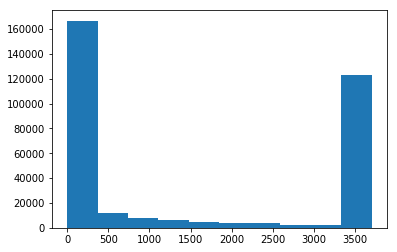

In [106]:
times=meterology.index[meterology.station=='MDT']
times=np.diff(times).astype(int)/10**9
max(times)
plt.hist(times.astype(int),range=(0,3700))

In [102]:
np.percentile(times, 99)

3600.0

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


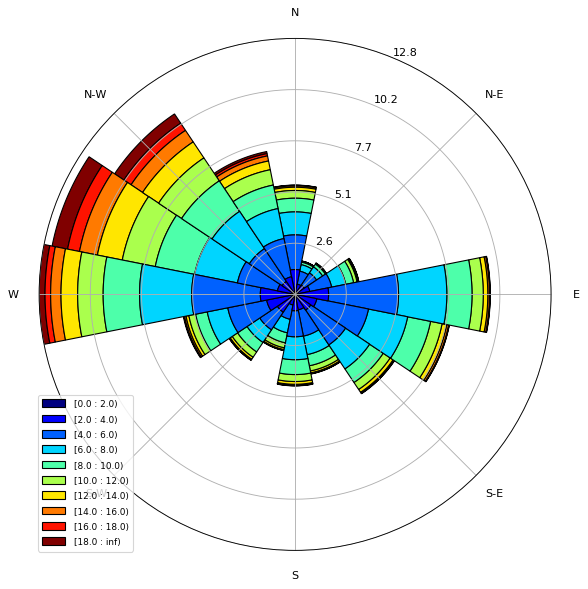

In [111]:
wd = meterology.drct
ws = meterology.sknt

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 20, 2))
ax.set_legend()